# PART 2 – Insurance Claim Types: What is being claimed?

In this section, we conduct statistics and analyze the claims generated in the data to understand their characteristics and trends. The research questions we pose are: 
- Which claims occur most often? Are there trends over time or geography?
- How are claims distributed by product category?

Answering these questions helps provide a comprehensive view of the claims situation, thereby supporting businesses in forecasting demand, allocating resources effectively and adjusting products to suit reality.

---

## 1. Download Data from excel file

The dataset used in this study is compiled from five main sheets: coverages, claimannouncements, products, regions and state regions.
- The claimannouncements sheet contains detailed information about each insurance claim, including the time of occurrence, announcement date, and the forecasted payout amount.
- The coverages sheet provides contextual information about each claim, such as the insurance product type, distribution channel, renewal type, and payment method.
- The products sheet offers a structured taxonomy of insurance products, categorizing them by product ID, category, subcategory, and product name.
- The state regions sheet maps states to their corresponding regions and provides additional geographic details for spatial analysis.
- Finally, the regions sheet provides demographic and geographic information about the insured individuals, such as region name, population, income, and location coordinates, linked via the InsuredID.

These sheets are interconnected through common identifiers like CoverID, ProductID, and InsuredID, allowing for a comprehensive and integrated analysis of both claim behaviors and product or customer characteristics.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import openpyxl
from sklearn.impute import SimpleImputer
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
file_path = r"C:\Users\DELL\OneDrive\Documents\BIG DATA\Cleaned_Insurance_Claims_Data_2.xlsx"
excel_file = pd.ExcelFile(file_path)

In [4]:
sheet_names = excel_file.sheet_names

In [5]:
print(f"File có các sheet sau: {sheet_names}")

File có các sheet sau: ['Products', 'Coverages', 'Participants', 'Brokers', 'Regions', 'State Regions', 'Policies', 'ClaimsAnnouncements', 'ClaimsPayments', 'ClaimsReserves']


In [6]:
all_dfs = {}
for sheet in sheet_names:
    df = pd.read_excel(file_path, sheet_name=sheet)
    all_dfs[sheet] = df

In [7]:
all_dfs["ClaimsAnnouncements"].drop(columns = ['ClaimID', 'ClaimCode'], inplace = True)
all_dfs["ClaimsAnnouncements"].head()

,PolicyID,PolicyCode,AnnouncementDate,EventDate,ClosingDate,LastForecastAmount,BrokerID,InsuredID,ProductID
0,807778,Pol-807778,2018-05-22,2018-05-19,2018-08-30,25296.46,394,386585,58
1,807800,Pol-807800,2017-10-20,2017-10-10,2017-11-20,3700.00,394,19191,58
2,807800,Pol-807800,2018-11-05,2018-11-02,2019-05-20,257.24,394,19191,58
3,807800,Pol-807800,2019-06-03,2019-05-29,2020-03-04,11062.23,394,19191,58
4,807800,Pol-807800,2019-11-27,2019-10-11,2019-12-10,500.00,394,19191,58


In [8]:
all_dfs["Regions"].drop(columns = ['water_area','time_zone'], inplace = True)
all_dfs["Regions"].head()

,id,name,county,state_code,state,type,latitude,longitude,area_code,population,households,median_income,land_area,InsuredID
0,1,Auburn,Lee County,AL,Alabama,City,32.60986,-85.48078,334,62059,21767,38342,152375113,121236
1,2,Birmingham,Shelby County/Jefferson County,AL,Alabama,City,33.52744,-86.79905,205,212461,89972,31061,378353942,246840
2,3,Decatur,Limestone County/Morgan County,AL,Alabama,City,34.57332,-86.99214,256,55437,22294,41496,141006257,289105
3,4,Dothan,Dale County/Houston County/Henry County,AL,Alabama,City,31.23370,-85.40682,334,68567,25913,42426,232166237,83936
4,5,Hoover,Shelby County/Jefferson County,AL,Alabama,City,33.37695,-86.80558,205,84848,32789,77146,122016784,10101


In [ ]:
all_dfs["Products"].head()

In [ ]:
all_dfs["Coverages"].head()

In [ ]:
all_dfs["State Regions"].head()

In [12]:
#Join 5 DataFrames
Coverages_and_Products = pd.merge(
    all_dfs["Coverages"],
    all_dfs["Products"]
)
all_dfs["Coverages_and_Products"] = Coverages_and_Products

Coverages_Products_ClaimsAnnouncements = pd.merge(
    all_dfs["Coverages_and_Products"],
    all_dfs["ClaimsAnnouncements"]
)
all_dfs["Coverages_Products_ClaimsAnnouncements"] = Coverages_Products_ClaimsAnnouncements

Coverages_Products_ClaimsAnnouncements_Regions = pd.merge(
    all_dfs["Coverages_Products_ClaimsAnnouncements"],
    all_dfs["Regions"]
)
all_dfs["Coverages_Products_ClaimsAnnouncements_Regions"] = Coverages_Products_ClaimsAnnouncements_Regions

Coverages_Products_ClaimsAnnouncements_Regions_State = pd.merge(
    all_dfs["Coverages_Products_ClaimsAnnouncements_Regions"],
    all_dfs["State Regions"],
    left_on='state',  
    right_on='State'  
)
all_dfs["Coverages_Products_ClaimsAnnouncements_Regions_State"] = Coverages_Products_ClaimsAnnouncements_Regions_State

Coverages_Products_ClaimsAnnouncements_Regions_State.head()

,CoverID,CoverCode,RenewalType,Participation,ProductCategory,PremiumMode,ProductDistribution,ProductID,ProductSubCategory,Product,...,latitude,longitude,area_code,population,households,median_income,land_area,State Code,State,Region
0,197,Gro-0019741465,Unknown,0,Health,Periodic,Group,56,Outpatient Care,HOC-056,...,44.56457,-123.26204,541,55780,21588,42488,36886730,OR,Oregon,West
1,197,Gro-0019741465,Unknown,0,Health,Periodic,Group,56,Outpatient Care,HOC-056,...,44.56457,-123.26204,541,55780,21588,42488,36886730,OR,Oregon,West
2,197,Gro-0019741465,Unknown,0,Health,Periodic,Group,56,Outpatient Care,HOC-056,...,34.13612,-117.86534,626,52009,16722,75148,50251851,CA,California,West
3,197,Gro-0019741465,Unknown,0,Health,Periodic,Group,56,Outpatient Care,HOC-056,...,47.60621,-122.33207,206,684451,296633,70594,217138889,WA,Washington,West
4,197,Gro-0019741465,Unknown,0,Health,Periodic,Group,56,Outpatient Care,HOC-056,...,40.79895,-81.37845,330,71885,30220,29418,66843044,OH,Ohio,Midwest


## 2. Data Processing
 In this code, we preprocess the data by removing unnecessary identifier columns, classifying variables into numeric and categorical, and then handling missing values ​​by filling in the median for numeric variables and filling in the most common value for categorical variables. This helps clean and standardize the data before analysis.

In [13]:
# Identify numerical and categorical columns
numerical_cols = Coverages_Products_ClaimsAnnouncements_Regions_State.select_dtypes(include=['number']).columns.tolist()
categorical_cols = Coverages_Products_ClaimsAnnouncements_Regions_State.select_dtypes(include=['object']).columns.tolist()

# Handle missing values using SimpleImputer
num_imputer = SimpleImputer(strategy="mean")
Coverages_Products_ClaimsAnnouncements_Regions_State[numerical_cols] = num_imputer.fit_transform(Coverages_Products_ClaimsAnnouncements_Regions_State[numerical_cols])

cat_imputer = SimpleImputer(strategy="most_frequent")
Coverages_Products_ClaimsAnnouncements_Regions_State[categorical_cols] = cat_imputer.fit_transform(Coverages_Products_ClaimsAnnouncements_Regions_State[categorical_cols])


In this code, we use the IQR (Interquartile Range) method to detect and remove outliers in the LastForecastAmount variable, to ensure reliability and accuracy for subsequent analysis.

In [14]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = Coverages_Products_ClaimsAnnouncements_Regions_State['LastForecastAmount'].quantile(0.25)
Q3 = Coverages_Products_ClaimsAnnouncements_Regions_State['LastForecastAmount'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the data to remove outliers
data_clean = Coverages_Products_ClaimsAnnouncements_Regions_State[(Coverages_Products_ClaimsAnnouncements_Regions_State['LastForecastAmount'] >= lower_bound) & (Coverages_Products_ClaimsAnnouncements_Regions_State['LastForecastAmount'] <= upper_bound)]

# Display the cleaned data
data_clean.head()

,CoverID,CoverCode,RenewalType,Participation,ProductCategory,PremiumMode,ProductDistribution,ProductID,ProductSubCategory,Product,...,latitude,longitude,area_code,population,households,median_income,land_area,State Code,State,Region
0,197.0,Gro-0019741465,Unknown,0.0,Health,Periodic,Group,56.0,Outpatient Care,HOC-056,...,44.56457,-123.26204,541.0,55780.0,21588.0,42488.0,36886730.0,OR,Oregon,West
1,197.0,Gro-0019741465,Unknown,0.0,Health,Periodic,Group,56.0,Outpatient Care,HOC-056,...,44.56457,-123.26204,541.0,55780.0,21588.0,42488.0,36886730.0,OR,Oregon,West
2,197.0,Gro-0019741465,Unknown,0.0,Health,Periodic,Group,56.0,Outpatient Care,HOC-056,...,34.13612,-117.86534,626.0,52009.0,16722.0,75148.0,50251851.0,CA,California,West
3,197.0,Gro-0019741465,Unknown,0.0,Health,Periodic,Group,56.0,Outpatient Care,HOC-056,...,47.60621,-122.33207,206.0,684451.0,296633.0,70594.0,217138889.0,WA,Washington,West
4,197.0,Gro-0019741465,Unknown,0.0,Health,Periodic,Group,56.0,Outpatient Care,HOC-056,...,40.79895,-81.37845,330.0,71885.0,30220.0,29418.0,66843044.0,OH,Ohio,Midwest


## 3. Data Visualization: Relationships Between Variables
In this section, we use five charts to visualize the relationship between variables in the dataset, helping to better understand the distribution and trends of insurance claims. Specifically, we use: 
- Bar charts to show the distribution of claims by product type and contract characteristics 
- Line charts to show the trend of claims by month 
- Bar charts to show the distribution of final forecast amounts 
- Boxplots and pie chart to analyze the distribution of forecast amounts by insurance type. 
- In addition, catplots are also used to analyze the distribution of forecast amounts by each type of renewal contract (Renewal Type) and product distribution, helping to detect differences between groups in the data. 

These charts will provide insight into the factors affecting claims and help detect patterns or trends in the data.
### 3.1. Distribute requirements according to product and contract specifications
In this section, we use bar charts to visualize the distribution of claims by product and contract characteristics, including ProductCategory, RenewalType, ProductID, and ProductDistribution. These charts help clarify which product or contract types generate claims most frequently, thereby assisting in identifying trends and high-risk groups.


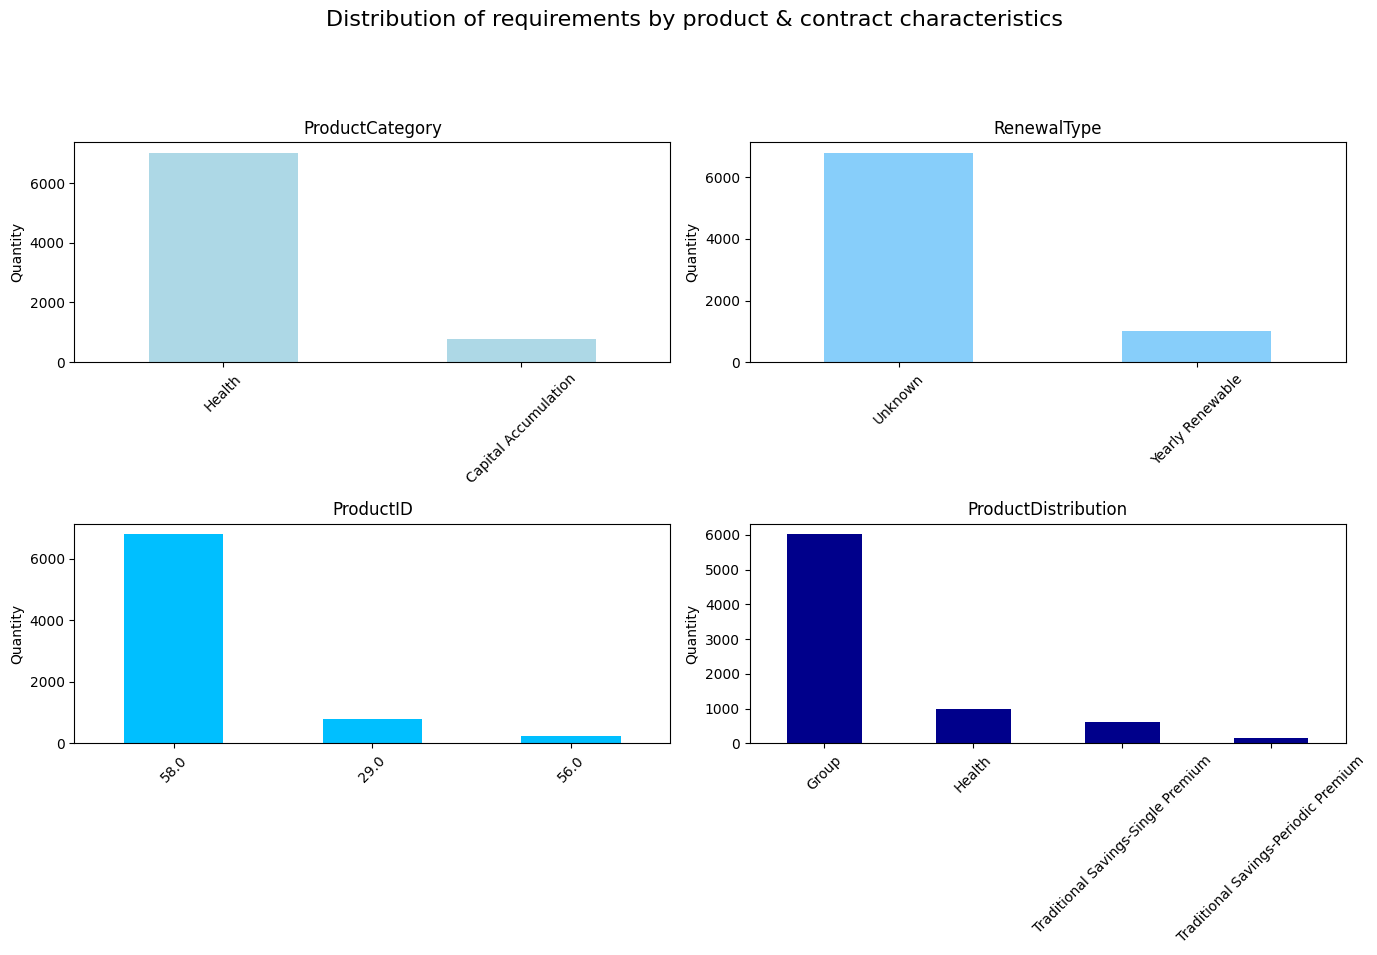

In [20]:
cols = ['ProductCategory', 'RenewalType', 'ProductID', 'ProductDistribution']
titles = ['ProductCategory', 'RenewalType', 'ProductID', 'ProductDistribution']
colors = ['lightblue', 'lightskyblue', 'deepskyblue', 'darkblue']

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Distribution of requirements by product & contract characteristics', fontsize=16, x=0.5, ha='center')

for ax, col, title, color in zip(axes.flat, cols, titles, colors):
    data_clean[col].value_counts().plot(kind='bar', color=color, ax=ax)
    ax.set_title(title)
    ax.set_ylabel('Quantity')
    ax.set_xlabel('')
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout(rect=[0, 0.03, 1, 0.92])  
plt.show()

Results: 
- Product Category: The chart shows that the majority of requirements come from the Health product group, indicating that this is the dominant and potentially highest-risk category.
- Renewal Type: The Unknown renewal type accounts for most of the requirements, which may reflect data limitations or a lack of standardized renewal practices. Meanwhile, Yearly Renewable shows a small proportion, possibly due to low usage or underreporting.
- Product ID: The product with ProductID 58 overwhelmingly dominates the number of requirements, suggesting that this is either the most popular or most risk-prone product in the portfolio.
- Product Distribution: The Group distribution channel has significantly more requirements than others, highlighting the prominent role of group-based insurance and its associated risks.

### 3.2 Are there trends over time or geography?
This section explores both temporal and geographical trends in the dataset, analyzing the frequency of claims over time and their distribution across different regions and product subcategories. To illustrate these patterns, two visualizations are presented: a line chart depicting monthly trends in claims and a heatmap demonstrating the distribution of claim types by region
#### 3.2.1 Claims trends over time
The following code below uses a line chart to show the trend of claims volume by month based on the AnnouncementDate field. Analyzing over time helps identify periods of high or low claim frequency, which can help with demand forecasting, resource allocation, and risk management.

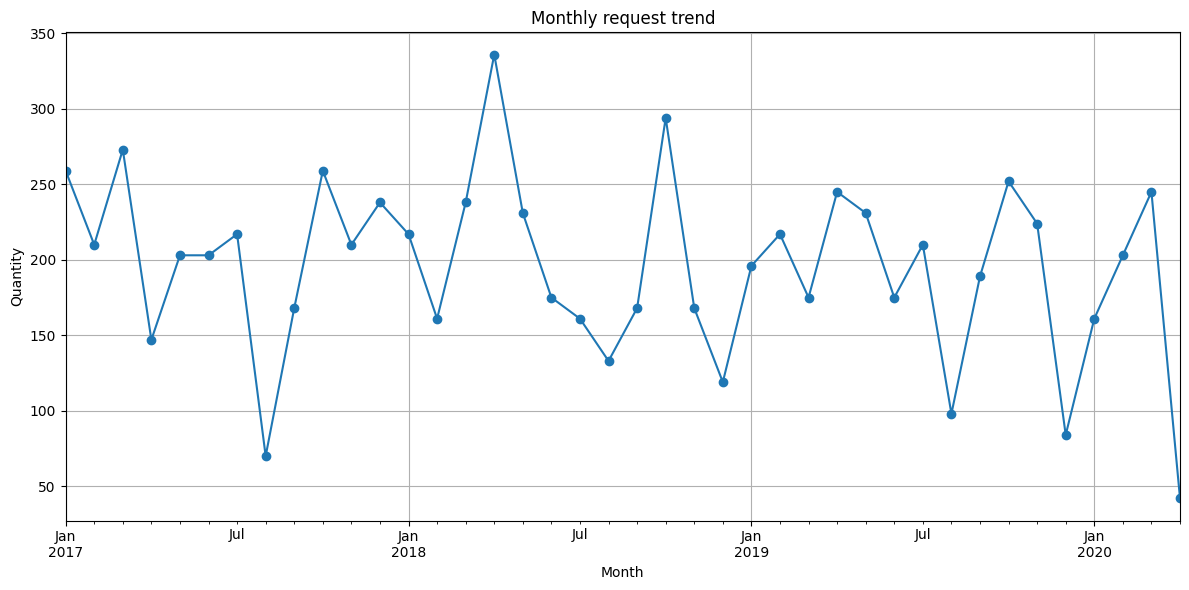

In [181]:
data_clean.loc[:, 'Month'] = pd.to_datetime(data_clean['AnnouncementDate']).dt.to_period('M')

monthly_counts = data_clean.groupby('Month').size()

plt.figure(figsize=(12,6))
monthly_counts.plot(kind='line', marker='o')
plt.title('Monthly request trend')
plt.xlabel('Month')
plt.ylabel('Quantity')
plt.grid(True)
plt.tight_layout()
plt.show()

Results:  
Based on the monthly trend line chart, the number of requests generally fluctuated around a stable level from 2017 to mid-2019, with some slight spikes. However, from late 2019 to early 2020, there was a clear and abrupt decline, especially in the first few months of 2020 when the number of requests dropped sharply to very low levels. This may reflect the impact of external factors such as the pandemic or policy changes.

#### 3.2.2 Claims trends in different geographic 
This section provides a detailed visualization of how claim types are distributed across regions.

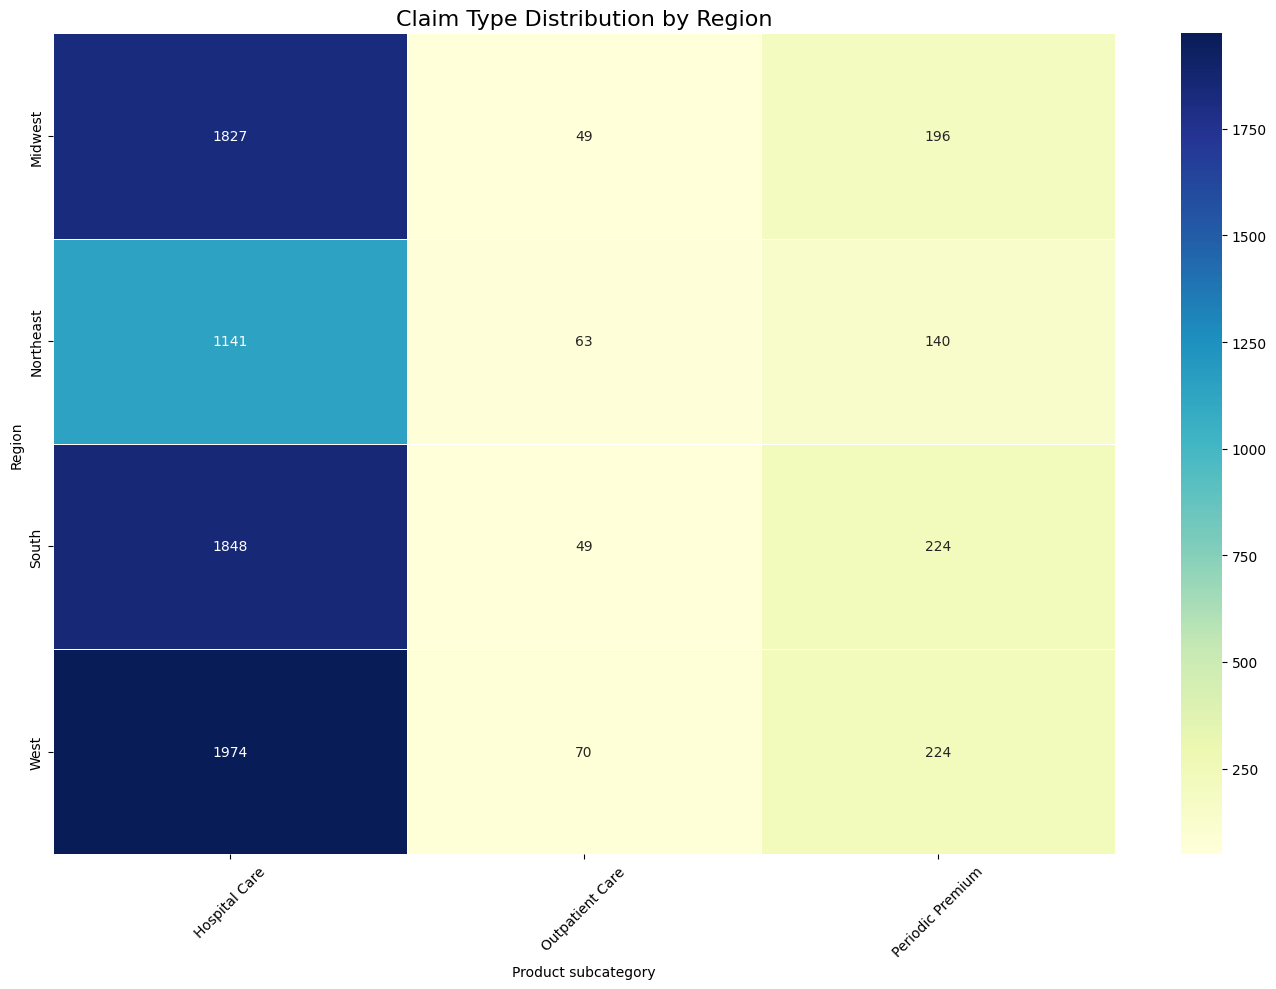

In [176]:
grouped = data_clean.groupby(['Region', 'ProductSubCategory']).size().reset_index(name='count')

pivot_table = grouped.pivot(index='Region', columns='ProductSubCategory', values='count').fillna(0)

plt.figure(figsize=(14, 10))
sns.heatmap(pivot_table, annot=True, fmt='.0f', cmap='YlGnBu', linewidths=0.5)

plt.title('Claim Type Distribution by Region', fontsize=16)
plt.xlabel('Product subcategory')
plt.ylabel('Region')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Results :  
The heatmap shows significant differences in the distribution of insurance claims across geographic regions. 
Hospital Care-related claims predominate across all regions, especially the West. Meanwhile, Outpatient Care claims are less common and Periodic Premiums vary by region, with the South and West having higher numbers. These differences reflect regional differences in demand, insurance usage, or access to health services.

### 3.3 Distribution of LastForecastAmount
In this section, we use a histogram to show the distribution of the quantitative variable LastForecastAmount – the final forecast amount for claims. The histogram helps to identify the concentration of data, detect common value ranges, as well as assess the dispersion and skewness of this quantitative variable.

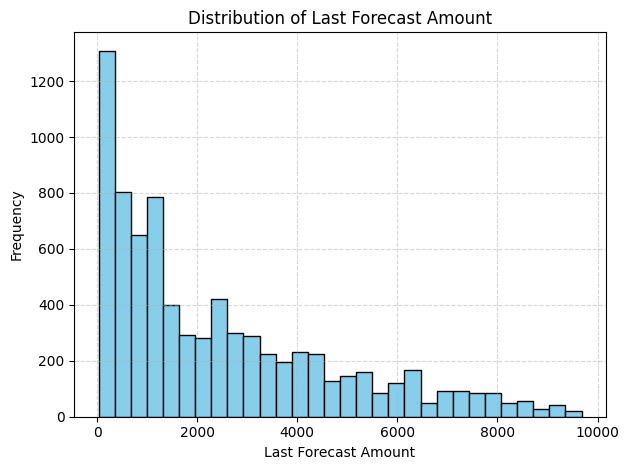

In [164]:
data_clean['LastForecastAmount'].plot(
    kind='hist',
    bins=30,
    title='Distribution of Last Forecast Amount',
    color='skyblue',
    edgecolor='black'  
)
plt.xlabel('Last Forecast Amount')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Results:  The chart shows:
- Concentration of data at low values: The majority of the forecasted amounts are concentrated at the lowest values, between 0 and 1,000. This is the range with the highest frequency, with over 2,000 occurrences.

- Right skewed distribution: As the forecasted amount increases, the frequency decreases. This shows that larger values ​​are less common in the data set.

- Sharp decline at high values: From about 8,000 and above, the occurrences become very rare, almost negligible.

### 3.4 Distribution of forecast amounts by insurance type and renewal contract
This section uses the boxplots, pie chart and a catplot to show the distribution of the LastForecastAmount variable according to contract characteristics, including insurance type (ProductDistribution) and contract renewal status (RenewalType). Through the combination of two-dimensional visualizations, the chart helps to compare and contrast groups clearly, supporting in-depth analysis of the claim cost structure in each product segment.

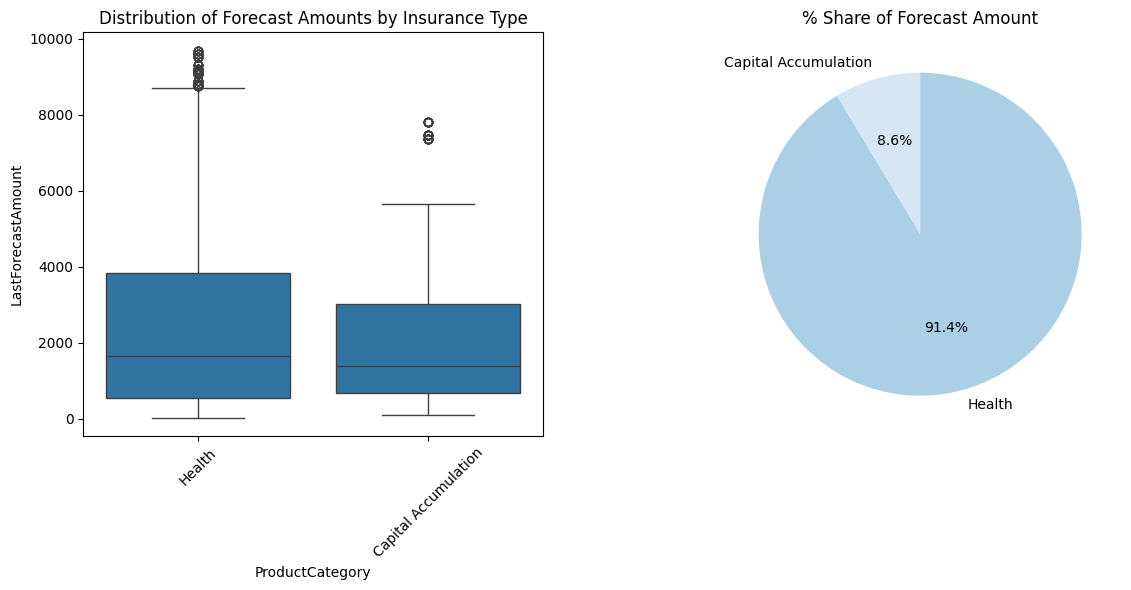

In [ ]:
# Calculate percentage by ProductCategory
percent_df = (
    data_clean.groupby('ProductCategory')['LastForecastAmount']
    .sum()
    .reset_index()
)
total = percent_df['LastForecastAmount'].sum()
percent_df['Percentage'] = 100 * percent_df['LastForecastAmount'] / total

# Draw boxplot and pie chart side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 6), gridspec_kw={'width_ratios': [1, 2]})

# Boxplot
sns.boxplot(data=data_clean, x='ProductCategory', y='LastForecastAmount', ax=axes[0])
axes[0].set_title('Distribution of Forecast Amounts by Insurance Type')
axes[0].tick_params(axis='x', rotation=45)

# Pie chart
axes[1].pie(
    percent_df['LastForecastAmount'],
    labels=percent_df['ProductCategory'],
    autopct='%1.1f%%',
    startangle=90,
    colors = sns.color_palette('Blues', n_colors=5)  
)
axes[1].set_title('% Share of Forecast Amount')

plt.tight_layout()
plt.show()

Results : 
- The box plot shows a skewed distribution: Most of the forecast values ​​are concentrated at the lower end of the scale (close to zero), with few outliers at higher values. This indicates a right-skewed distribution, suggesting that low forecasts are typical, while high forecasts are rare but do occur.
Both the Health and Capital Accumulation portfolios show similar patterns of concentration at low values. However, Health appears to have a wider distribution and more outliers at higher values.
- The pie chart shows that the Health portfolio accounts for the majority of the total forecasts (over 90%), while Capital Accumulation contributes a small portion (~8.6%). This suggests that while both portfolios may have similar distributions, Health dominates in terms of overall monetary impact.

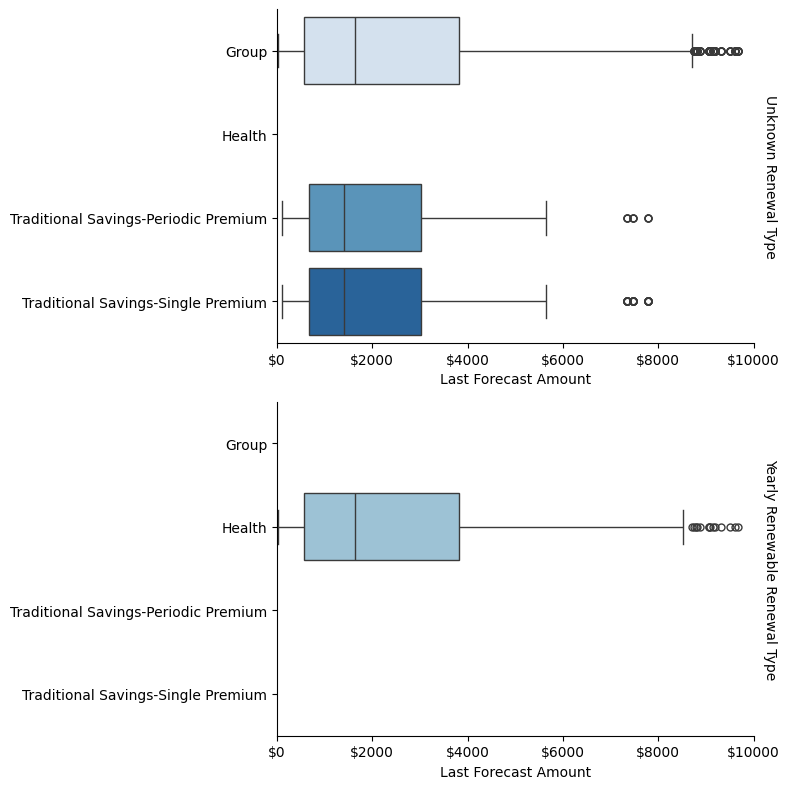

In [186]:
#Catplot: Forecast Amount Distribution by Contract Renewal Type
g = sns.catplot(
    data=data_clean,
    x="LastForecastAmount", y="ProductDistribution", row="RenewalType",
    kind="box", orient="h",
    sharex=False, margin_titles=True,
    height=4, aspect=2,  
    palette="Blues"  
)
g.set(xlabel="Last Forecast Amount", ylabel="", xlim=(0, 10000))  
g.set_titles(row_template="{row_name} Renewal Type")
for ax in g.axes.flat:
    ax.xaxis.set_major_formatter('${x:.0f}')
plt.tight_layout()  

Results: This chart provides a detailed look at the distribution of the Last Forecast Amount by policy type and renewal type.

- Differences between renewal types: Renewal types such as "Whole Life Renewal Type," "Unknown Renewal Type," and "Yearly Renewable Renewal Type" have different distributions of forecast amounts. For example, the "Unknown Renewal Type" has more outliers than the other types.

- Distribution by Contract Type: Contract types such as "Health," "Other Life," and "Traditional Savings-Periodic Premium" have different levels of volatility. "Traditional Savings-Periodic Premium" tends to have higher forecast values, while "Health" tends to be concentrated at lower levels.

- Outlier Trends:Some outliers appear across different renewal types and contract types, especially in the "Unknown Renewal Type," indicating inconsistency in the data.

## 4. Conclusion
From the presented visual charts, several salient conclusions can be drawn.
- First of all, claims are most frequently associated with the Health product group, indicating that this category dominates the dataset in terms of volume and possibly reflects higher risk exposure. This directly addresses the research question regarding which claims occur most often clearly, health-related claims are the most prevalent.
- In addition, the trend of claims over time shows signs of decreasing, especially clearly in the last months of the observation period. This declining trend provides a temporal insight into how claim volumes are evolving, suggesting possible shifts in policyholder behavior, healthcare access, or insurance plan effectiveness over time.
- Geographically, the heatmap highlights significant variations in claim types between regions. While the West reports the highest volume of claims, certain regions like the Northeast show considerably lower frequencies, reflecting regional differences in insurance demand or accessibility. This answers the research question on geographic trends and reinforces the need for localized insurance strategies.
- Regarding product characteristics, the data reveals that the Health product category overwhelmingly dominates the forecast amount, accounting for over 91% of the total, suggesting it is the most utilized or highest-risk segment. Additionally, the Group distribution channel consistently shows higher forecast amounts compared to other categories, underlining its significant role in the insurance landscape. Furthermore, the Unknown renewal type appears most frequently and displays high variability in forecast values, raising potential concerns around data completeness or the lack of standardized renewal definitions, which may affect risk evaluation and planning accuracy.

These insights provide an essential foundation for identifying both temporal and regional trends, aiding optimization in the combination of insurance business strategies moving forward.